In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv('/Users/belinda/Desktop/DAC-Internal-Projects/dataset/Resale_Flat_Prices.csv')

In [8]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [10]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [11]:
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [12]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,194170.000000,194170.000000,1.941700e+05
mean,97.032377,1996.159196,5.062432e+05
std,24.041678,14.129136,1.768102e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.050000e+05
max,366.700000,2021.000000,1.588000e+06


In [13]:
#converting month and lease_commence_date to datetime format
data['month'] = pd.to_datetime(data['month'])
data['lease_commence_date'] = pd.to_datetime(data['lease_commence_date'], format="%Y")
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01-01,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01-01,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01-01,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,62 years 05 months,265000.0


In [14]:
#unique values for town,flattypes and flatmodels
print("Unique town values")
print(data['town'].unique())
print("Unique flat models")
print(data['flat_model'].unique())
print("Unique flat type")
print(data['flat_type'].unique())

Unique town values
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
Unique flat models
['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']
Unique flat type
['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


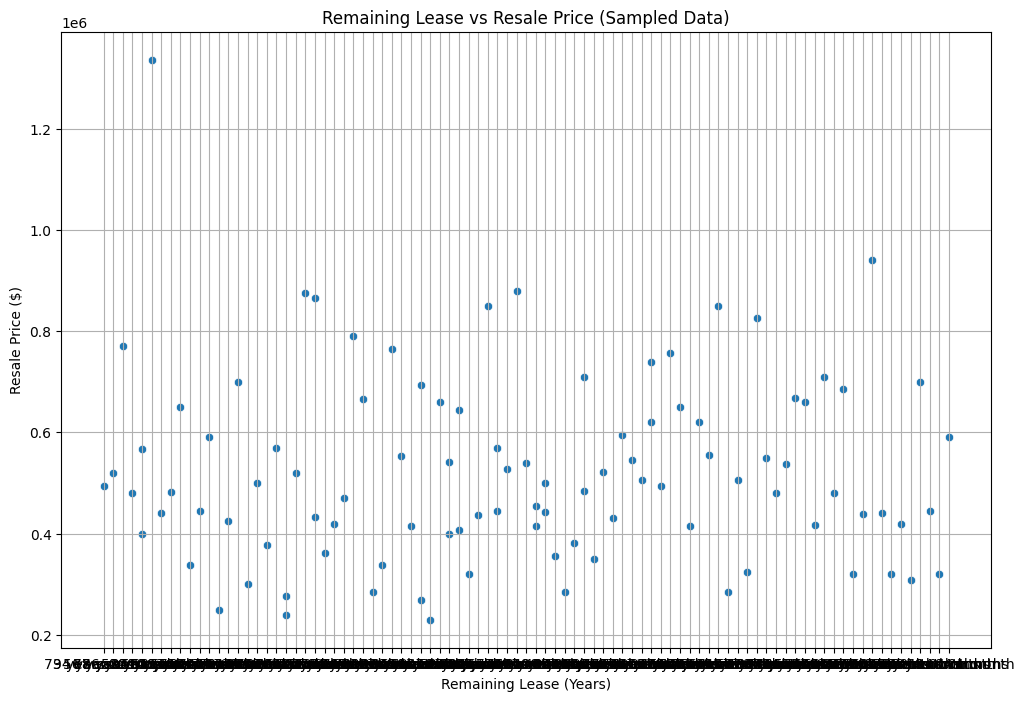

In [15]:
sampled_df = data.sample(n=100, random_state=1)

# Plotting the sampled data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='remaining_lease', y='resale_price', data=sampled_df)
plt.title('Remaining Lease vs Resale Price (Sampled Data)')
plt.xlabel('Remaining Lease (Years)')
plt.ylabel('Resale Price ($)')
plt.grid(True)
plt.show()


In [16]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (294, 11)


In [17]:
data = data.drop_duplicates()
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 11)


In [18]:
data.to_csv('C:/Users/Admin/Desktop/Github/DAC-Internal-Projects/dataset/updated_dataset.csv', index=False)



OSError: Cannot save file into a non-existent directory: 'C:/Users/Admin/Desktop/Github/DAC-Internal-Projects/dataset'